<a href="https://colab.research.google.com/github/kumarrV8/Deep-Learning-CNN-Models/blob/main/LeNetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building First classic Convolutional Neural Network => LeNet

__Lenet-5 is one of the earliest pre-trained models proposed by Yann LeCun and others in the year 1998, in the research paper Gradient-Based Learning Applied to Document Recognition. They used this architecture for recognizing the handwritten and machine-printed characters.__ 

<p>The main reason behind the popularity of this model was its simple and straightforward architecture. It is a multi-layer Convolutional Neural Network for image Classification. </p>

# The Architecture of the Model: 

This network has 5 layers with learnable parameter and hence called LeNet-5. It has three sets of Convolution with a combinatuion of average pooling and then it has two fully connected layers.


> Conv1+AvgPooling (filter size = (5,5),#6) , Stride = 2 with AvgPooling


> Conv2+AvgPooling (filter size = (5,5),#16), , Stride = 2 with AvgPooling 


> Conv+Stride (filter size = (5,5),#120) 
>Fully connected = 84
>Fully connected = 10 (SoftMax)









## Let's Build the first model with keras mnist dataset

### Importing libraries and downloading data

In [1]:
from keras.datasets import mnist 
from keras.utils import np_utils 
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras import models, layers 



In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


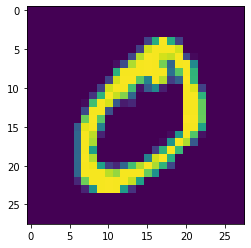

In [4]:
# we have 60k for training and 10k for testing data set
plt.imshow(X_train[1,:,:])

Train Images ->


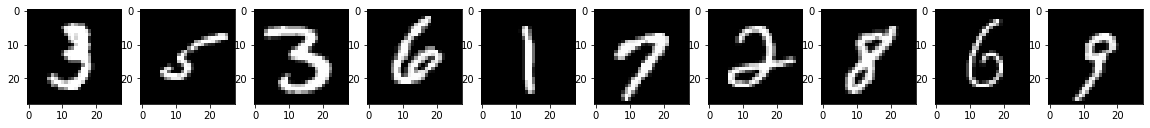

In [5]:
# lets visualize the image of Class size = 10  
plt.figure(figsize = (20,4)) 
print("Train Images ->") 
for i in range(10,20,1):
    plt.subplot(2,10,i+1) 
    plt.imshow(X_train[i,:,:], cmap='gray') 
plt.show()

### Normalization of pixel size to (0,1)

In [6]:
# set the numeric type to float32 
X_train = X_train.astype("float32") 
X_test = X_test.astype("float32") 

# Normalize 
X_train = X_train/255 
X_test = X_test/255 

In [7]:
print(y_train.shape)

(60000,)


In [8]:
# class variable is categorical data tranform it using ohe-hot-encoding 
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
print(y_train.shape)

(60000, 10)


In [10]:
# since we are using gray scale image set the channel last to 1 
X_train = X_train.reshape(X_train.shape[0], 28,28,1) 
X_test = X_test.reshape(X_test.shape[0], 28,28,1) 
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Image showing the model structures

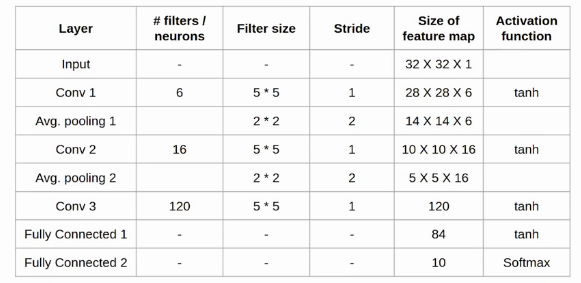

# Defining LeNet

In [11]:
def LeNetModel():
    model = Sequential()

    # add first layer (convolution layer) 
    model.add(layers.Conv2D(filters=6, kernel_size=(3,3), activation='tanh', input_shape=(28,28,1))) 
    #Averagepooling layers 
    model.add(layers.AveragePooling2D()) 
    # add the second convolution layer 
    model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='tanh')) 
    #AveragePooling layer
    model.add(layers.AveragePooling2D()) 
    # add the third convolution layer 
    model.add(layers.Conv2D(filters=120, kernel_size=(5,5), activation='tanh')) 

    #flatting the model to connect fully 
    model.add(layers.Flatten()) 

    # first dense layer 
    model.add(layers.Dense(84, activation='tanh')) 
    #second dense layer 
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [12]:
model = LeNetModel() 

# summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

### Model Compilation and Fitting over test data set 

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# fit the model 

model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test)) 


Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2452 - accuracy: 0.9268 - val_loss: 0.1295 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0964 - accuracy: 0.9710 - val_loss: 0.0713 - val_accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0632 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0646 - val_accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0534 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0420 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0529 -

In [16]:
import numpy as np
prediction = model.predict(X_test) 

313/313 [==============================] - 2s 5ms/step


Predicted class is : 6


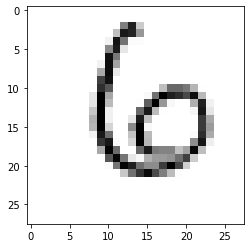

Predicted class is : 0


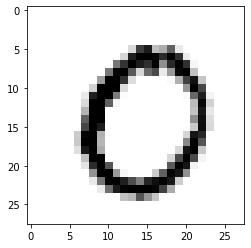

Predicted class is : 5


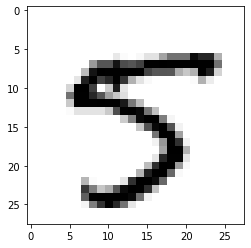

Predicted class is : 4


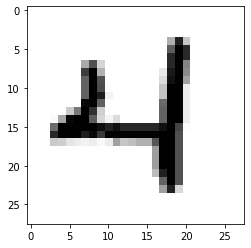

Predicted class is : 5


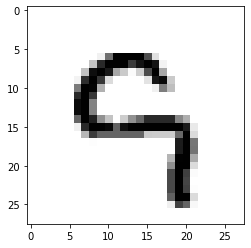

Predicted class is : 9


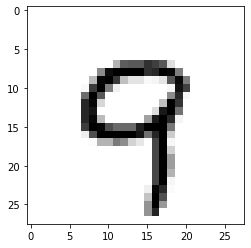

In [17]:
for i in range(100,106):
    print("Predicted class is :", np.argmax(prediction[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary) 
    plt.show()